In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5172720


In [5]:
!mkdir $LOCAL/sandbox

In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5172720/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [31]:
import data

In [9]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [13]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [5]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [32]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [33]:
traintest.num_dataset()

5

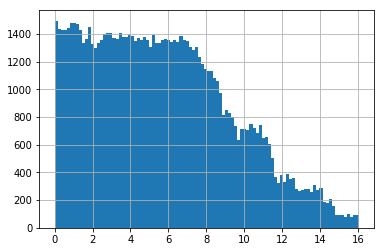

In [34]:
traintest.ydf.hist(bins=100);

In [35]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0330319987328633

In [36]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [37]:
data=traintest.traindf
data.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_06_o12335883  0.156437  0.244621  0.081701 -0.163753  0.091905   
quake_06_o25216421  0.157536  0.271464  0.124014 -0.176790  0.097522   
quake_13_o28475278  0.185761  0.201594  0.125613 -0.089880  0.050035   
quake_02_o9368778   0.214502  0.198830  0.072022 -0.049693  0.068464   
quake_10_o38179421  0.220792  0.207845  0.088708 -0.127670  0.100127   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_06_o12335883 -0.046509 -0.008670  0.211759  0.167524 -0.084765  ...   
quake_06_o25216421 -0.030146  0.030561  0.261057  0.180587 -0.168938  ...   
quake_13_o28475278 -0.111882 -0.020312  0.169395  0.182872 -0.021724  ...   
quake_02_o9368778  -0.141831 -0.040528  0.121614  0.160225  0.093205  ...   
quake_10_o38179421 -0.090492 -0.038071  0.206328  0.162908 -0.073467  ...   

                      fwv_90    fwv_91    fwv_92    fwv_93    fwv_94  \
index                                                                  
quake_06_o12335883  0.093560  0.151648  0.100599  0.054341  0.075084   
quake_06_o25216421  0.093371  0.151623  0.032730  0.027534  0.076513   
quake_13_o28475278  0.048211  0.204921  0.057847  0.045248 -0.055089   
quake_02_o9368778   0.066572  0.178950  0.160326  0.055604 -0.046111   
quake_10_o38179421  0.096437  0.175536  0.064879  0.034085 -0.045666   

                      fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  
index                                                                 
quake_06_o12335883  0.038466  0.055209 -0.095905 -0.022652  0.033997  
quake_06_o25216421  0.020787  0.054496 -0.120348 -0.024599  0.158972  
quake_13_o28475278  0.024561 -0.014821 -0.119440  0.034188  0.104555  
quake_02_o9368778   0.026349  0.011278 -0.054834  0.055502 -0.081393  
quake_10_o38179421  0.007604  0.000866 -0.116146  0.025749  0.072271  

[5 rows x 100 columns]

In [54]:
ydf=traintest.ydf
ydf.head()

index
quake_06_o12335883     3.815999
quake_06_o25216421     0.470796
quake_13_o28475278     1.130797
quake_02_o9368778     11.708996
quake_10_o38179421     1.470697
Name: y, dtype: float64

In [39]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_06_o12335883      6
quake_06_o25216421      6
quake_13_o28475278     13
quake_02_o9368778       2
quake_10_o38179421     10

In [40]:
qdf['index'].value_counts().to_frame().sort_index().T

0     1     2     3     4     5     6     7     8     9     10    11  \
index  829  6516  8006  5000  7167  4548  3985  9092  4464  5440  6452  6224   

         12    13    14    15    16  
index  4984  4836  8329  5341  1050

In [41]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{0: 829,
 1: 6516,
 2: 8006,
 3: 5000,
 4: 7167,
 5: 4548,
 6: 3985,
 7: 9092,
 8: 4464,
 9: 5440,
 10: 6452,
 11: 6224,
 12: 4984,
 13: 4836,
 14: 8329,
 15: 5341,
 16: 1050}

In [42]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [43]:
quake_duration= \
[11.540078961038962,
 14.179604675324676,
 8.85586935064935,
 12.693342077922077,
 8.054755844155844,
 7.058949350649351,
 16.10632,
 7.90581038961039,
 9.636769090909091,
 11.426242077922078,
 11.02408909090909,
 8.828208311688313,
 8.565425974025974,
 14.750916623376623,
 9.459098441558442]
quake_duration = {i+1:u for i,u in enumerate(quake_duration)}
quake_duration

{1: 11.540078961038962,
 2: 14.179604675324676,
 3: 8.85586935064935,
 4: 12.693342077922077,
 5: 8.054755844155844,
 6: 7.058949350649351,
 7: 16.10632,
 8: 7.90581038961039,
 9: 9.636769090909091,
 10: 11.426242077922078,
 11: 11.02408909090909,
 12: 8.828208311688313,
 13: 8.565425974025974,
 14: 14.750916623376623,
 15: 9.459098441558442}

In [57]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.953199717016
2 0.775762107045
3 1.24211407875
4 0.866596041647
5 1.36565281591
6 1.55830555704
7 0.682961719375
8 1.39138171268
9 1.14146140644
10 0.962696214992
11 0.997814867903
12 1.24600594046
13 1.28423268537
14 0.745716370098
15 1.1629015247


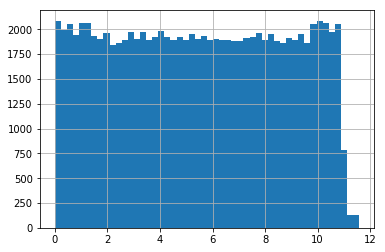

In [58]:
ydf.hist(bins=50);

In [59]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [60]:
n_thread=3

In [63]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=qdf['index']==qno
    tridx=~qdf['index'].isin({qno,0,16})
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 3500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [64]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [65]:
validScores={}
for qno in quakes:
    s=train_quake(qno,params,n_thread)
    print "quake ", qno,s
    validScores[qno]=s

valid quake 1
(83868, 100) (83868,) (6516, 100) (6516,)
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 1.20346	valid_1's l1: 1.51048
[200]	training's l1: 1.0417	valid_1's l1: 1.35951
[300]	training's l1: 0.990676	valid_1's l1: 1.31543
[400]	training's l1: 0.961032	valid_1's l1: 1.30156
[500]	training's l1: 0.935507	valid_1's l1: 1.29414
[600]	training's l1: 0.913985	valid_1's l1: 1.29246
[700]	training's l1: 0.894986	valid_1's l1: 1.29258
Early stopping, best iteration is:
[537]	training's l1: 0.927378	valid_1's l1: 1.29207
quake  1 (1.2920684666714315, 537)
valid quake 2
(82378, 100) (82378,) (8006, 100) (8006,)
Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 1.19523	valid_1's l1: 1.55513
[200]	training's l1: 1.03391	valid_1's l1: 1.42007
[300]	training's l1: 0.984021	valid_1's l1: 1.37719
[400]	training's l1: 0.954574	valid_1's l1: 1.36327
[500]	training's l1: 0.930181	valid_1's l1: 1.3603
[600]	training's l1: 0

[200]	training's l1: 1.05777	valid_1's l1: 1.14346
[300]	training's l1: 1.00522	valid_1's l1: 1.14842
Early stopping, best iteration is:
[155]	training's l1: 1.10423	valid_1's l1: 1.14137
quake  15 (1.1413665602425433, 155)


In [66]:
vdf=pd.DataFrame(validScores).T
vdf.columns=['score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf['qlen']=vdf.index.map(lambda u: qlen[u])
vdf=vdf.sort_values('score')

In [67]:
vdf

score  round  qlen
3   0.884282    215  5000
9   0.939405    465  5440
12  0.980726    250  4984
11  1.058261    335  6224
10  1.092092    920  6452
13  1.110748    340  4836
4   1.116440    488  7167
15  1.141367    155  5341
5   1.255496    433  4548
1   1.292068    537  6516
2   1.358873    585  8006
8   1.374032    152  4464
7   1.414615    705  9092
6   1.455863    734  3985
14  1.464969    750  8329

In [31]:
vdf

score  round   qlen
9   1.040118    228  24728
3   1.206984    110  22727
11  1.342689   1184  28291
12  1.433742    133  22654
10  1.468812      0  29324
13  1.557133    107  21979
16  1.570331      0   4769
1   1.694303      0  29616
15  1.884502     14  24275
5   2.011889     45  20671
8   2.121203     27  20288
4   2.199258      0  32577
6   2.378514     28  18114
2   2.893717      0  36387
0   3.145862    874   3767
14  3.249264      0  37857
7   3.814185      0  41335

### let us use another feature

In [32]:
if 1:
    import data
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [33]:
data=traintest.traindf
data.head()

mean       std    max    min  mean_change_abs  \
index                                                                   
quake_14_o38092704  3.666627  4.993766   90.0  -56.0         0.000007   
quake_05_o21076314  4.555954  5.038841   82.0  -83.0         0.000007   
quake_09_o34152517  4.604113  7.545202  167.0 -140.0        -0.000013   
quake_07_o29907005  4.280827  5.699806  103.0  -82.0         0.000000   
quake_03_o11370843  4.879340  5.799320  157.0 -119.0         0.000007   

                    mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                     
quake_14_o38092704      74976.414062     90.0      0.0         5.429905   
quake_05_o21076314      74998.843750     83.0      0.0         5.412611   
quake_09_o34152517      75000.164062    167.0      0.0         5.787636   
quake_07_o29907005      74986.921875    103.0      0.0         4.169597   
quake_03_o11370843      75024.054688    157.0      0.0         3.742580   

                    std_last_50000  ...  std_roll_mean_1000  \
index                               ...                       
quake_14_o38092704        5.069834  ...            0.240719   
quake_05_o21076314        4.721151  ...            0.240171   
quake_09_o34152517        7.067223  ...            0.249858   
quake_07_o29907005        5.847459  ...            0.227964   
quake_03_o11370843        7.001203  ...            0.223350   

                    max_roll_mean_1000  min_roll_mean_1000  \
index                                                        
quake_14_o38092704               4.350               2.807   
quake_05_o21076314               5.203               3.783   
quake_09_o34152517               5.431               3.425   
quake_07_o29907005               5.171               3.606   
quake_03_o11370843               5.707               4.202   

                    q01_roll_mean_1000  q05_roll_mean_1000  \
index                                                        
quake_14_o38092704               3.093               3.232   
quake_05_o21076314               4.066               4.160   
quake_09_o34152517               4.076               4.227   
quake_07_o29907005               3.763               3.882   
quake_03_o11370843               4.342               4.504   

                    q95_roll_mean_1000  q99_roll_mean_1000  \
index                                                        
quake_14_o38092704               4.059               4.192   
quake_05_o21076314               4.931               5.079   
quake_09_o34152517               5.053               5.311   
quake_07_o29907005               4.649               4.747   
quake_03_o11370843               5.233               5.347   

                    av_change_abs_roll_mean_1000  \
index                                              
quake_14_o38092704                 -5.369128e-07   
quake_05_o21076314                 -2.530201e-06   
quake_09_o34152517                 -3.536913e-06   
quake_07_o29907005                  2.013423e-07   
quake_03_o11370843                 -2.597315e-06   

                    av_change_rate_roll_mean_1000  abs_max_roll_mean_1000  
index                                                                      
quake_14_o38092704                   74388.601562                   4.350  
quake_05_o21076314                   74481.226562                   5.203  
quake_09_o34152517                   74545.054688                   5.431  
quake_07_o29907005                   74674.039062                   5.171  
quake_03_o11370843                   74716.171875                   5.707  

[5 rows x 137 columns]

In [34]:
ydf=traintest.ydf
ydf.head()

index
quake_14_o38092704    4.818398
quake_05_o21076314    2.541899
quake_09_o34152517    0.727197
quake_07_o29907005    8.299899
quake_03_o11370843    5.864797
Name: y, dtype: float64

In [35]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [36]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3767  29616  36387  22727  32577  20671  18114  41335  20288  24728   

          10     11     12     13     14     15    16  
index  29324  28291  22654  21979  37857  24275  4769

In [37]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{0: 3767,
 1: 29616,
 2: 36387,
 3: 22727,
 4: 32577,
 5: 20671,
 6: 18114,
 7: 41335,
 8: 20288,
 9: 24728,
 10: 29324,
 11: 28291,
 12: 22654,
 13: 21979,
 14: 37857,
 15: 24275,
 16: 4769}

In [38]:
quakes=set(qdf['index'])
quakes

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [39]:
import utils
n_thread= utils.get_num_thread()
n_thread

3

In [40]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=qdf['index']==qno
    tridx=~teidx
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [41]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [42]:
validScores={}
for qno in quakes:
    s=train_quake(qno,params,n_thread)
    print "quake ", qno,s
    validScores[qno]=s

valid quake 0
(415592, 137) (415592,) (3767, 137) (3767,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.2174	valid_1's l1: 4.09107
[100]	training's l1: 1.91292	valid_1's l1: 3.69395
[150]	training's l1: 1.75169	valid_1's l1: 3.49165
[200]	training's l1: 1.6495	valid_1's l1: 3.36282
[250]	training's l1: 1.57343	valid_1's l1: 3.28968
[300]	training's l1: 1.50944	valid_1's l1: 3.24854
[350]	training's l1: 1.45473	valid_1's l1: 3.21764
[400]	training's l1: 1.41136	valid_1's l1: 3.20751
[450]	training's l1: 1.36566	valid_1's l1: 3.20875
[500]	training's l1: 1.32309	valid_1's l1: 3.20118
[550]	training's l1: 1.28616	valid_1's l1: 3.20106
[600]	training's l1: 1.25419	valid_1's l1: 3.20916
[650]	training's l1: 1.22512	valid_1's l1: 3.20612
[700]	training's l1: 1.19754	valid_1's l1: 3.19829
Early stopping, best iteration is:
[515]	training's l1: 1.31169	valid_1's l1: 3.19733
quake  0 (3.197332223760518, 515)
valid quake 1
(389743, 137) (389743,) (29616, 13

[200]	training's l1: 1.62221	valid_1's l1: 2.64311
Early stopping, best iteration is:
[23]	training's l1: 2.52633	valid_1's l1: 2.14489
quake  8 (2.14488720190639, 23)
valid quake 9
(394631, 137) (394631,) (24728, 137) (24728,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.2771	valid_1's l1: 1.54515
[100]	training's l1: 1.97089	valid_1's l1: 1.27592
[150]	training's l1: 1.79565	valid_1's l1: 1.1849
[200]	training's l1: 1.68634	valid_1's l1: 1.17056
[250]	training's l1: 1.60167	valid_1's l1: 1.18414
[300]	training's l1: 1.53228	valid_1's l1: 1.19413
[350]	training's l1: 1.47673	valid_1's l1: 1.20413
Early stopping, best iteration is:
[185]	training's l1: 1.71602	valid_1's l1: 1.16777
quake  9 (1.167768876812924, 185)
valid quake 10
(390035, 137) (390035,) (29324, 137) (29324,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 2.24329	valid_1's l1: 2.05844
[100]	training's l1: 1.95206	valid_1's l1: 1.79059
[150]	trai

In [43]:
vdf=pd.DataFrame(validScores).T
vdf.columns=['score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf['qlen']=vdf.index.map(lambda u: qlen[u])
vdf=vdf.sort_values('score')

In [44]:
vdf

score  round   qlen
9   1.167769    185  24728
3   1.345736     82  22727
11  1.381004    544  28291
10  1.483830   1252  29324
12  1.488454    137  22654
13  1.598404     93  21979
1   1.646257    412  29616
16  1.791868   1072   4769
15  1.907288     14  24275
5   2.049056     35  20671
4   2.109377      0  32577
8   2.144887     23  20288
6   2.376928     17  18114
2   2.831856      0  36387
0   3.197332    515   3767
14  3.223022    875  37857
7   3.807670    949  41335